In [50]:
pip install wordcloud
pip install scattertext

In [70]:
import pandas as pd
import numpy as np
import datetime 
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Dataset.csv')

In [12]:
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,6.107044e+17,"""""""@realJoeMurray: Hopefully tomorrow is the d...",f,f,Twitter for Android,68,40,2015-06-16 07:04:03,f
1,6.107044e+17,"""""""@brentcfritz: Today is the day America beco...",f,f,Twitter for Android,95,54,2015-06-16 07:04:19,f
2,6.107106e+17,"""""""@insuraider: @realDonaldTrump is going to m...",f,f,Twitter for Android,58,32,2015-06-16 07:28:37,f
3,6.107106e+17,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",f,f,Twitter for Android,32,17,2015-06-16 07:28:54,f
4,6.107107e+17,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",f,f,Twitter for Android,33,23,2015-06-16 07:29:11,f
...,...,...,...,...,...,...,...,...,...
8302,8.453343e+17,"Today, I was thrilled to announce a commitment...",f,f,Twitter for iPhone,76003,16366,2017-03-24 17:59:42,f
8303,8.456287e+17,Happy #MedalOfHonorDay to our heroes! ➡️https:...,f,f,Twitter for iPhone,58348,11477,2017-03-25 13:29:17,f
8304,8.456459e+17,ObamaCare will explode and we will all get tog...,f,f,Twitter for Android,88209,18187,2017-03-25 14:37:52,f
8305,8.456468e+17,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,f,f,Twitter for Android,43089,8203,2017-03-25 14:41:14,f


#### Drop all tweets that start with """, which is a retweet

In [13]:
s = df.text.str.contains(r'["""]')
df = df[~s].reset_index(drop=True)

##### Checking distribution of Android vs. all other platforms/devices. 

Overall, relatively even distribution of Android vs. Non-Android (Trump vs. Not Trump)

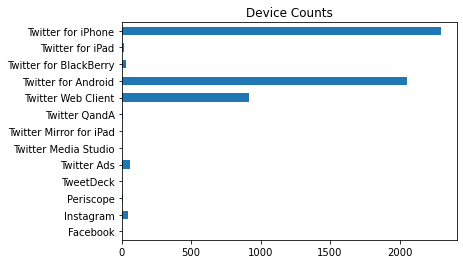

In [14]:
plt = df.device.value_counts().sort_index().plot.barh(title = 'Device Counts')

In [15]:
#Create list of all non-Android devices
x = df.device.unique()
non_android = list(x)
non_android.remove('Twitter for Android')

In [16]:
#Check that Android devices aren't in this list
print(non_android)

['Twitter Web Client', 'Instagram', 'Twitter for iPhone', 'Periscope', 'Twitter for BlackBerry', 'Facebook', 'Twitter QandA', 'Twitter Mirror for iPad', 'Twitter Ads', 'Twitter for iPad', 'Twitter Media Studio', 'TweetDeck']


In [17]:
#Replace all non-Android devices as 0 (Staff Member) and Android devices as 1 (Trump)
df.device.replace(to_replace = non_android , value = 'Staff Member' , inplace = True)
df.device.replace(to_replace = 'Twitter for Android' , value = 'Trump' , inplace = True)

In [18]:
df.device.value_counts()

Staff Member    3381
Trump           2056
Name: device, dtype: int64

##### Checking distribution of deleted tweets. 
The number of tweets that are categorized as deleted is not significant enough for this analysis, this feature will be dropped.

In [19]:
df.isDeleted.value_counts()

f    5425
t      12
Name: isDeleted, dtype: int64

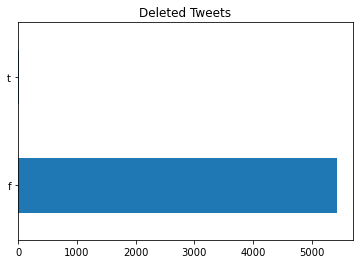

In [20]:
plt = df.isDeleted.value_counts().sort_index().plot.barh(title = 'Deleted Tweets')

In [21]:
df = df.drop(columns = ['id' , 'isRetweet' , 'isDeleted' , 'isFlagged'])

# Create New Features Including:

- Punctuation (!,?) usage per tweet
- URLs per tweet
- Tweet hour and tweet month based on datetime column
- Emojis per tweet (This was later scrubbed given only 83 tweets out of 8,224 used emojis, however I am leaving the code to 
  show the analysis)

### Create column "punctuation" that will count # of !'s and ?'s which usually show strong emotions. 

In [22]:
df['punctuation'] = df['text'].str.count(r'[!,?]')

1     2021
2     1327
0     1079
3      681
4      228
5       76
6       18
7        4
8        1
12       1
9        1
Name: punctuation, dtype: int64

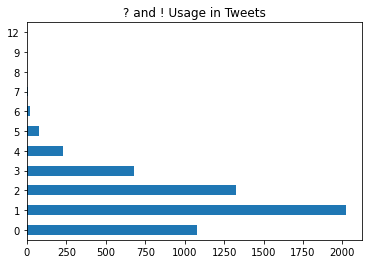

In [23]:
plt = df.punctuation.value_counts().sort_index().plot.barh(title = '? and ! Usage in Tweets')
df.punctuation.value_counts()

### Create column "url" that will count # of URLs

In [24]:
df['url'] = df['text'].str.count(r'https?:\/\/\S+')

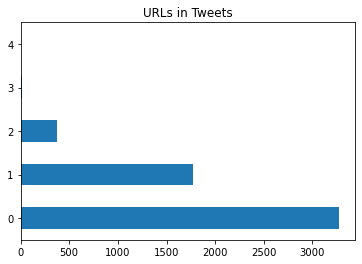

In [25]:
plt = df.url.value_counts().sort_index().plot.barh(title = 'URLs in Tweets')

In [26]:
#There is no significant categorical distribution of URL counts, so changing this to boolean instead 0 (False) / 1 (True)

df.url.replace(to_replace = 4 , value = 1 , inplace = True)
df.url.replace(to_replace = 3 , value = 1 , inplace = True)
df.url.replace(to_replace = 2 , value = 1 , inplace = True)

### Create split 'date' column to 'date' and 'time 

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df["time"] = df["date"].dt.time
df["date"] = df["date"].dt.date

In [29]:
df['hour'] = df['time'].apply(lambda x: x.hour)

In [30]:
df['month'] = df['date'].apply(lambda x : x.month)

### Create line graph showing time tweets throughout the day by user

In [34]:
df_temp = df.groupby(['hour' , 'device']).size().reset_index(name = 'counts')

In [79]:
df_trump = df_temp[df_temp.device == 'Trump']
df_staff = df_temp[df_temp.device == 'Staff Member']

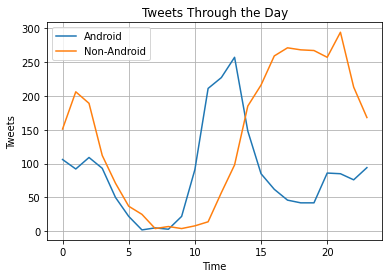

In [112]:
line_1 = plt.plot(df_trump.hour, df_trump.counts)
line_2 = plt.plot(df_staff.hour, df_staff.counts)

plt.legend(['Android' , 'Non-Android'])
plt.title('Tweets Through the Day')
plt.xlabel('Time')
plt.ylabel('Tweets')
plt.grid()
plt.show()

### Create column "emojis" that will count # of emoji uses

In [493]:
df['emojis'] = df['text'].str.count("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

0    5414
1      19
7       2
5       1
3       1
Name: emojis, dtype: int64

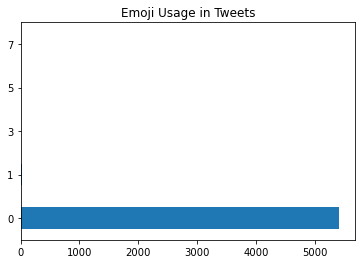

In [494]:
plt = df.emojis.value_counts().sort_index().plot.barh(title = 'Emoji Usage in Tweets')
df.emojis.value_counts()

Not signficant distribution so will drop this feature

In [495]:
df = df.drop(columns = ['emojis'])

In [496]:
df.head()

,text,device,favorites,retweets,date,punctuation,url,time,hour,month
0,Big time in U.S. today - MAKE AMERICA GREAT AG...,Trump,419,275,2015-06-16,1,0,12:20:40,12,6
1,Thanks. https://t.co/eZfgrOy1Hn,Staff Member,135,46,2015-06-16,0,1,12:24:41,12,6
2,It is almost time. I will be making a major an...,Staff Member,763,400,2015-06-16,1,0,13:04:05,13,6
3,Make sure to follow me on @periscopeco #MakeAm...,Staff Member,164,66,2015-06-16,0,0,13:07:50,13,6
4,In one hour I will be making a major announcem...,Staff Member,306,175,2015-06-16,1,1,14:01:13,14,6


# Text Preprocessing

In [497]:
#Cleaning the terms in the document term matrix

#Creating an object to hold the emoji unicodes
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def clean_text(text):
    
    #remove @ (mentions)
    text = re.sub(r'@[A-Za-z0-9_]+', '' , text)
    
    #remove retweets
    text = re.sub(r'RT[\s]+' , '' , text)
    
    #remove # (hashtags)
    text = re.sub(r'#(\w+)' , '' , text)
    
    #remove URLS
    text = re.sub(r'https?:\/\/\S+' , '' , text)
    
    #remove emojis
    text = emoji_pattern.sub(r'', text)
    
    #remove digits
    text = re.sub(r'\d+' , '' , text)
    
    #remove underscores (_)
    text = re.sub(r'_[A-Za-z0-9]+', '' , text)
    
    #remove punctuation 
    text = re.sub(r'[^\w\s]+' , '' , text)
    
    #remove html & ('&amp')
    text = text.replace('amp' , '')
    
    return text

In [498]:
df['text'] = df['text'].apply(clean_text)

In [499]:
corpus = df['text']

# Sentiment Analysis w/ VADER

In [116]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [117]:
my_text = df.text[0]
score = analyzer.polarity_scores(my_text)
sentiment_0 = score['compound']

In [118]:
print(score)

{'neg': 0.075, 'neu': 0.75, 'pos': 0.175, 'compound': 0.6027}


In [119]:
df['sentiment']  = df.text.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
df['neg'] = df.text.map(analyzer.polarity_scores).map(lambda x: x.get('neg')) 
df['neu'] = df.text.map(analyzer.polarity_scores).map(lambda x: x.get('neu'))
df['pos'] = df.text.map(analyzer.polarity_scores).map(lambda x: x.get('pos'))

In [120]:
df

,text,device,favorites,retweets,date,punctuation,url,time,hour,month,sentiment,neg,neu,pos
0,Big time in U.S. today - MAKE AMERICA GREAT AG...,Trump,419,275,2015-06-16,1,0,12:20:40,12,6,0.6027,0.075,0.750,0.175
1,Thanks. https://t.co/eZfgrOy1Hn,Staff Member,135,46,2015-06-16,0,1,12:24:41,12,6,0.4404,0.000,0.256,0.744
2,It is almost time. I will be making a major an...,Staff Member,763,400,2015-06-16,1,0,13:04:05,13,6,0.0000,0.000,1.000,0.000
3,Make sure to follow me on @periscopeco #MakeAm...,Staff Member,164,66,2015-06-16,0,0,13:07:50,13,6,0.3182,0.000,0.753,0.247
4,In one hour I will be making a major announcem...,Staff Member,306,175,2015-06-16,1,1,14:01:13,14,6,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,"Today, I was thrilled to announce a commitment...",Staff Member,76003,16366,2017-03-24,2,1,17:59:42,17,3,0.8286,0.000,0.696,0.304
5433,Happy #MedalOfHonorDay to our heroes! ➡️https:...,Staff Member,58348,11477,2017-03-25,1,1,13:29:17,13,3,0.8070,0.000,0.451,0.549
5434,ObamaCare will explode and we will all get tog...,Trump,88209,18187,2017-03-25,1,0,14:37:52,14,3,0.7781,0.000,0.746,0.254
5435,Watch @JudgeJeanine on @FoxNews tonight at 9:0...,Trump,43089,8203,2017-03-25,0,0,14:41:14,14,3,0.0000,0.000,1.000,0.000


In [129]:
df.groupby('device' , as_index = False)['sentiment'].median()

,device,sentiment
0,Staff Member,0.36120
1,Trump,0.06905


In [133]:
df.groupby('device' , as_index = False)['sentiment'].mean()

,device,sentiment
0,Staff Member,0.235548
1,Trump,0.089589


# Scattertext

Creates scattertext for EDA purposes and to illustrate any variance between tweets from Android devices (theoretical Trump tweets) vs. non-Android devices (theoretical Staff Member tweets). 

In [561]:
import scattertext as st

In [562]:
#Creating contents of Scattertext
scatter_df = df[['text' , 'device']].copy()
scatter_df.dtypes

text      object
device    object
dtype: object

In [563]:
scatter_corpus = st.CorpusFromPandas(
    df,
    category_col = 'device',
    text_col = 'text',
    nlp=st.whitespace_nlp_with_sentences
).build()

html = st.produce_scattertext_explorer(
        scatter_corpus,
        category='Trump',
        category_name='Trump',
        not_category_name='Staff Member',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        )

In [564]:
open('trump_texts.html', 'wb').write(html.encode('utf-8'));

# Stemming

Will also remove stopwords and make all words lowercase.

In [509]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction import text
import nltk

In [510]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [511]:
stemmer = SnowballStemmer('english')
    
#initiate stopwords object
stopwords = nltk.corpus.stopwords.words('english')

#Additional high-use words that weren't captured in stop words dictionary
new_words = ['just' , 'make' , 'bad' , 'like' , 'lets' , 'rump' , 'akeamericagreatagain']

for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [512]:
#Create method to iterate through stemming as part of the vectorize process
def stem(word, stemmer = None):
    
    #if word is already in stop words dictionary, return none
    if word.lower() in stopwords:
        return None
    
    #if stemmer returns N/A, return the lowercaser version of word
    elif stemmer is None:
        return word.lower()
    
    #else stem the word
    else:
        return stemmer.stem(word)

# Initiate CountVectorizer

In [513]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (1,2) , binary = True , stop_words = stopwords , min_df = 2 , max_df = 0.7 , preprocessor=stem)

In [514]:
tweet_terms = cv.fit_transform(corpus)
doc_term = pd.DataFrame(tweet_terms.toarray() , columns = cv.get_feature_names())

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [515]:
vec_names = cv.get_feature_names()

In [516]:
doc_term

,abandon,abc,abc newswashington,abcwashington,abcwashington post,abe,abe japan,abedin,aberdeen,ability,...,zero,zero cred,zero credibility,zero polls,zogby,zogby poll,zones,zucker,zuckerman,zuckermans
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# NMF Model

In [517]:
#Fitting the document-term matrix into a NMF model
from sklearn.decomposition import NMF

#Number of topics 
nmf = NMF(10)

nmf_transformed = nmf.fit_transform(doc_term)

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [518]:
nmf_top_words = 10
nmf_topic_words = {}

for nmf_topic, nmf_comp in enumerate(nmf.components_):
    nmf_word_idx = np.argsort(nmf_comp)[::-1][:nmf_top_words]
    nmf_topic_words[nmf_topic] = [vec_names[i] for i in nmf_word_idx]

In [519]:
for x , y in nmf_topic_words.items():
    print(x,y,'\n')

0 ['great', 'job', 'today', 'great job', 'day', 'iowa', 'honor', 'state', 'crowd', 'great honor'] 

1 ['hillary', 'clinton', 'crooked', 'crooked hillary', 'hillary clinton', 'bernie', 'sanders', 'president', 'bernie sanders', 'obama'] 

2 ['thank', 'support', 'get', 'carolina', 'nice', 'thank support', 'words', 'florida', 'vote', 'together'] 

3 ['people', 'many', 'country', 'amazing', 'us', 'back', 'going', 'american', 'big', 'crowd'] 

4 ['new', 'poll', 'new hshire', 'hshire', 'new york', 'york', 'big', 'new poll', 'thank new', 'great new'] 

5 ['pm', 'tonight', 'join', 'enjoy', 'interviewed', 'tonight pm', 'tomorrow', 'interviewed tonight', 'pm enjoy', 'us'] 

6 ['cruz', 'ted', 'ted cruz', 'lyin', 'lyin ted', 'get', 'rubio', 'would', 'win', 'marco'] 

7 ['america', 'america great', 'great', 'going', 'never', 'together', 'get', 'let', 'safe', 'hard'] 

8 ['trump', 'donald', 'donald trump', 'via', 'poll', 'trump tower', 'tower', 'caign', 'news', 'bush'] 

9 ['last', 'night', 'last nig

# LSA Model

In [520]:
#Fitting the document-term matrix into a LSA model
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(10)
lsa_transformed = lsa.fit_transform(doc_term)

In [521]:
lsa_top_words = 10
lsa_topic_words = {}

for lsa_topic, lsa_comp in enumerate(lsa.components_):
    lsa_word_idx = np.argsort(lsa_comp)[::-1][:lsa_top_words]
    lsa_topic_words[lsa_topic] = [vec_names[i] for i in lsa_word_idx]

In [522]:
for x , y in lsa_topic_words.items():
    print(x,y,'\n')

0 ['great', 'thank', 'america', 'america great', 'new', 'people', 'hillary', 'poll', 'big', 'get'] 

1 ['hillary', 'clinton', 'crooked', 'crooked hillary', 'hillary clinton', 'bernie', 'people', 'would', 'president', 'trump'] 

2 ['thank', 'new', 'poll', 'hillary', 'support', 'new hshire', 'hshire', 'nice', 'carolina', 'crooked'] 

3 ['new', 'people', 'big', 'poll', 'trump', 'cruz', 'new hshire', 'hshire', 'pm', 'ted'] 

4 ['new', 'poll', 'america', 'new hshire', 'hshire', 'trump', 'america great', 'new york', 'york', 'new poll'] 

5 ['pm', 'tonight', 'join', 'enjoy', 'interviewed', 'tomorrow', 'tonight pm', 'interviewed tonight', 'pm enjoy', 'tickets'] 

6 ['new', 'people', 'great', 'hshire', 'new hshire', 'crooked', 'crooked hillary', 'crowd', 'soon', 'hillary clinton'] 

7 ['great', 'trump', 'last', 'night', 'poll', 'last night', 'tonight', 'enjoy', 'job', 'nice'] 

8 ['cruz', 'ted', 'ted cruz', 'last', 'night', 'last night', 'big', 'new', 'lyin', 'lyin ted'] 

9 ['last', 'night', '

# Initiate TF-IDF Vectorizer

In [523]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv_tfidf = TfidfVectorizer(ngram_range = (1,2) , stop_words = stopwords , min_df = 2 , max_df = 0.8 , preprocessor=stem)

tweet_terms = cv_tfidf.fit_transform(corpus)
doc_term = pd.DataFrame(tweet_terms.toarray() , columns = cv_tfidf.get_feature_names())

vec_names = cv_tfidf.get_feature_names()

doc_term

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc newswashington,abcwashington,abcwashington post,abe,abe japan,abedin,aberdeen,ability,...,zero,zero cred,zero credibility,zero polls,zogby,zogby poll,zones,zucker,zuckerman,zuckermans
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# NMF Model pt. 2 (TF-IDF)

In [524]:
#Fitting the document-term matrix into a NMF model
from sklearn.decomposition import NMF

#Number of topics 
nmf = NMF(10)

nmf_transformed = nmf.fit_transform(doc_term)

nmf_top_words = 10
nmf_topic_words = {}

for nmf_topic, nmf_comp in enumerate(nmf.components_):
    nmf_word_idx = np.argsort(nmf_comp)[::-1][:nmf_top_words]
    nmf_topic_words[nmf_topic] = [vec_names[i] for i in nmf_word_idx]

for x , y in nmf_topic_words.items():
    print(x,y,'\n')

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


0 ['thank', 'support', 'thank support', 'thank iowa', 'pennsylvania', 'nice', 'thank nice', 'florida', 'words', 'virginia'] 

1 ['america great', 'great', 'america', 'together america', 'hard never', 'let america', 'work hard', 'im work', 'never let', 'together'] 

2 ['interviewed', 'enjoy', 'interviewed enjoy', 'interviewed tonight', 'morning', 'pm enjoy', 'morning enjoy', 'interviewed pm', 'interviewed morning', 'tonight'] 

3 ['hillary', 'clinton', 'hillary clinton', 'crooked', 'crooked hillary', 'bernie', 'sanders', 'bernie sanders', 'president', 'judgement'] 

4 ['new', 'hshire', 'new hshire', 'poll', 'thank new', 'york', 'new york', 'new poll', 'great new', 'poll thank'] 

5 ['pm', 'tonight', 'tonight pm', 'join', 'pm enjoy', 'interviewed tonight', 'tomorrow', 'tickets', 'pm pm', 'ohio'] 

6 ['thank america', 'america', 'america safe', 'safe', 'together', 'safe great', 'america together', 'thank', 'poll', 'together america'] 

7 ['trump', 'via', 'donald', 'donald trump', 'poll', 

# LSA Model pt. 2 (TF-IDF)

In [525]:
#Fitting the document-term matrix into a LSA model
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(10)
lsa_transformed = lsa.fit_transform(doc_term)

lsa_top_words = 10
lsa_topic_words = {}

for lsa_topic, lsa_comp in enumerate(lsa.components_):
    lsa_word_idx = np.argsort(lsa_comp)[::-1][:lsa_top_words]
    lsa_topic_words[lsa_topic] = [vec_names[i] for i in lsa_word_idx]

for x , y in lsa_topic_words.items():
    print(x,y,'\n')

0 ['thank', 'great', 'america', 'america great', 'thank america', 'new', 'support', 'thank support', 'poll', 'new hshire'] 

1 ['america', 'great', 'america great', 'thank america', 'new', 'together', 'people', 'america safe', 'safe', 'together america'] 

2 ['interviewed', 'enjoy', 'pm', 'tonight', 'tonight pm', 'interviewed tonight', 'pm enjoy', 'interviewed enjoy', 'join', 'tomorrow'] 

3 ['hillary', 'clinton', 'hillary clinton', 'crooked', 'crooked hillary', 'new', 'trump', 'people', 'poll', 'new hshire'] 

4 ['new', 'new hshire', 'hshire', 'poll', 'join', 'great', 'thank new', 'big', 'carolina', 'people'] 

5 ['pm', 'join', 'tonight', 'tonight pm', 'tomorrow', 'carolina', 'south', 'ohio', 'south carolina', 'tickets'] 

6 ['pm', 'new', 'join', 'hshire', 'new hshire', 'america', 'thank america', 'tonight pm', 'hillary', 'tonight'] 

7 ['trump', 'via', 'donald', 'donald trump', 'poll', 'thank america', 'america', 'thanks', 'cruz', 'pm'] 

8 ['thanks', 'tonight', 'great', 'tonight pm'

Based on several iterations of tuning both vectorizer models, CountVectorizer provided the cleanest topic modeling. Specifically, the NMF model paired with CountVectorizer provided the best results.

# Create Column for Topics

In [526]:
#Chose the NMF Model using CountVectorizer doc-term matrix with 9 topics
nmf = NMF(9)

nmf_transformed = nmf.fit_transform(doc_term)

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [527]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ['Great Job America / Big Crowd' , 'Hillary Clinton / Bernie Sanders' , 'SC/FL/IA Primaries' , 
                     'American People' , 'NH/NY Primaries' , 'Interview Tonight' , 'Ted Cruz' , 'MAGA' , 'Donald Trump'],
             columns = cv.get_feature_names())

topic_word

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc newswashington,abcwashington,abcwashington post,abe,abe japan,abedin,aberdeen,ability,...,zero,zero cred,zero credibility,zero polls,zogby,zogby poll,zones,zucker,zuckerman,zuckermans
Great Job America / Big Crowd,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Hillary Clinton / Bernie Sanders,0.000,0.000,0.000,0.001,0.001,0.001,0.000,0.00,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SC/FL/IA Primaries,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
American People,0.002,0.004,0.004,0.000,0.000,0.000,0.000,0.01,0.000,0.015,...,0.035,0.003,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
NH/NY Primaries,0.000,0.010,0.006,0.005,0.005,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.004,0.024,0.025,0.000,0.000,0.000,0.000
Interview Tonight,0.001,0.006,0.000,0.001,0.001,0.007,0.002,0.00,0.003,0.000,...,0.029,0.002,0.004,0.002,0.000,0.000,0.000,0.001,0.004,0.002
Ted Cruz,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000
MAGA,0.005,0.008,0.004,0.002,0.002,0.000,0.000,0.00,0.004,0.000,...,0.000,0.000,0.000,0.000,0.009,0.008,0.014,0.001,0.000,0.000
Donald Trump,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [528]:
doc_topic = pd.DataFrame(nmf_transformed.round(5),
             index = df.index,
             columns = ['Great Job America / Big Crowd' , 'Donald Trump' , 'Hillary Clinton / Bernie Sanders' , 'SC/FL/IA Primaries' , 
                     'American People' , 'NH/NY Primaries' , 'MAGA' , 'Ted Cruz' , 'Interview'])
doc_topic

,Great Job America / Big Crowd,Donald Trump,Hillary Clinton / Bernie Sanders,SC/FL/IA Primaries,American People,NH/NY Primaries,MAGA,Ted Cruz,Interview
0,0.00000,0.07257,0.00000,0.00126,0.00000,0.06590,0.00244,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.51286
2,0.00000,0.00000,0.00000,0.00667,0.00092,0.02282,0.00013,0.00294,0.00000
3,0.00000,0.00000,0.00000,0.00015,0.00083,0.00375,0.00000,0.00117,0.00000
4,0.00000,0.00000,0.00047,0.00062,0.00000,0.02093,0.00000,0.06985,0.00000
...,...,...,...,...,...,...,...,...,...
5432,0.03539,0.00000,0.00000,0.00558,0.00000,0.02374,0.00051,0.00038,0.00000
5433,0.00004,0.00242,0.00000,0.00000,0.00051,0.00829,0.00000,0.00037,0.00039
5434,0.00046,0.02045,0.00000,0.00000,0.00000,0.04798,0.00678,0.00000,0.00000
5435,0.00004,0.00000,0.12799,0.00000,0.00000,0.02291,0.00000,0.00000,0.00000


In [529]:
dct_topics = {'Great Job America / Big Crowd' : 0 , 
              'Donald Trump' : 1 ,
              'Hillary Clinton / Bernie Sanders' : 2, 
              'SC/FL/IA Primaries' : 3, 
              'American People' : 4, 
              'NH/NY Primaries' : 5, 
              'MAGA' : 6, 
              'Ted Cruz' : 7, 
              'Interview' : 8}


df['topic'] = doc_topic[['Great Job America / Big Crowd' , 'Donald Trump' , 'Hillary Clinton / Bernie Sanders' , 'SC/FL/IA Primaries' , 
                     'American People' , 'NH/NY Primaries' , 'MAGA' , 'Ted Cruz' , 'Interview']].idxmax(axis=1).map(dct_topics)

In [530]:
df

,text,device,favorites,retweets,date,punctuation,url,time,hour,month,sentiment,neg,neu,pos,topic
0,Big time in US today MAKE AMERICA GREAT AGAIN...,Trump,419,275,2015-06-16,1,0,12:20:40,12,6,0.5622,0.081,0.740,0.179,1
1,Thanks,Staff Member,135,46,2015-06-16,0,1,12:24:41,12,6,0.4404,0.000,0.000,1.000,8
2,It is almost time I will be making a major ann...,Staff Member,763,400,2015-06-16,1,0,13:04:05,13,6,0.0000,0.000,1.000,0.000,5
3,Make sure to follow me on,Staff Member,164,66,2015-06-16,0,0,13:07:50,13,6,0.3182,0.000,0.685,0.315,5
4,In one hour I will be making a major announcem...,Staff Member,306,175,2015-06-16,1,1,14:01:13,14,6,0.0000,0.000,1.000,0.000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,Today I was thrilled to announce a commitment ...,Staff Member,76003,16366,2017-03-24,2,1,17:59:42,17,3,0.8286,0.000,0.647,0.353,0
5433,Happy to our heroes,Staff Member,58348,11477,2017-03-25,1,1,13:29:17,13,3,0.7906,0.000,0.222,0.778,5
5434,ObamaCare will explode and we will all get tog...,Trump,88209,18187,2017-03-25,1,0,14:37:52,14,3,0.7584,0.000,0.755,0.245,5
5435,Watch on tonight at PM,Trump,43089,8203,2017-03-25,0,0,14:41:14,14,3,0.0000,0.000,1.000,0.000,2


In [531]:
df.to_csv('Classification_Datasest.csv' , index = False)

# Classification with NMF Model with CountVectorizer features

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score , precision_score
import seaborn as sns
from matplotlib import cm

In [344]:
X = df['text']
y = df['device']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [345]:
#Create DataFrame to hold on three classification model results
results = pd.DataFrame(columns = ['LogReg' , 'BernoulliNB' , 'XGBoost'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [346]:
#Creating training and testing data based on CountVectorizer model from above
X_train = cv.fit_transform(X_train)
X_text = cv.transform(X_test)

In [347]:
#Confirming results are the same as doc_term matrix
pd.DataFrame(X_train.toarray(), columns=cv.get_feature_names()).head()

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,abc newswashington,abe,abe japan,abedin,aberdeen,ability,able,abolish,absolute,...,youve,yr,yr high,zero,zero credibility,zogby,zogby poll,zones,zucker,zuckerman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create Logistic Regression Model

Using as baseline results for comparison.

In [348]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train , y_train)
y_pred = lr.predict(X_text)

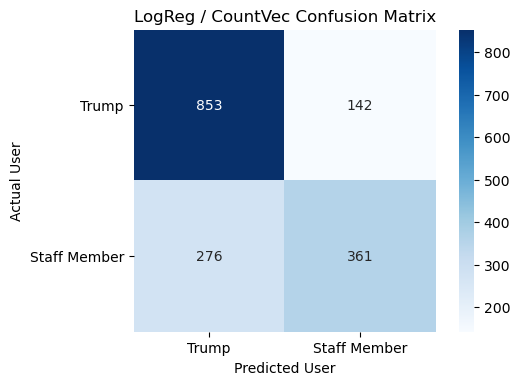

In [560]:
#Confusion matrix to show results from chosen model
lr_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(lr_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('LogReg / CountVec Confusion Matrix')
plt.yticks(rotation=0);

In [350]:
true_neg, false_pos = lr_cm[0]
false_neg, true_pos = lr_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

lr_temp = pd.DataFrame(columns = ['LogReg'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

lr_temp.loc['Accuracy'] = accuracy
lr_temp.loc['Precision'] = precision
lr_temp.loc['Recall'] = recall
lr_temp.loc['F1 Score'] = f1

lr_temp

,LogReg
Accuracy,0.76
Precision,0.723
Recall,0.626
F1 Score,0.671


### Create Bernoulli Naive Bayes Model

Using Bernoulli Naive Bayes because it works well with binary variables. The CountVectorizer that created the doc_term matrix sets parameter 'binary' to True (returns True / False on if the term is in the document). 

In [351]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

nb.fit(X_train , y_train)
y_pred = nb.predict(X_text)

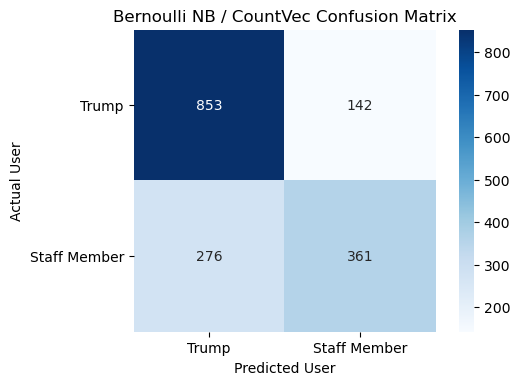

In [558]:
#Confusion matrix to show results from chosen model
nb_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(nb_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('Bernoulli NB / CountVec Confusion Matrix')
plt.yticks(rotation=0);

In [353]:
true_neg, false_pos = nb_cm[0]
false_neg, true_pos = nb_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

nb_temp = pd.DataFrame(columns = ['BernoulliNB'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

nb_temp.loc['Accuracy'] = accuracy
nb_temp.loc['Precision'] = precision
nb_temp.loc['Recall'] = recall
nb_temp.loc['F1 Score'] = f1

nb_temp

,BernoulliNB
Accuracy,0.743
Precision,0.719
Recall,0.562
F1 Score,0.631


### Create Multinomial Naive Bayes Model

The traditional Naive Bayes model used for text classification.

In [354]:
#Creating new CountVectorizer that removes the binary parameter
cv_mnb = CountVectorizer(ngram_range = (1,2) , stop_words = stopwords , min_df = 2 , max_df = 0.8 , preprocessor=stem)

X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_mnb = cv_mnb.fit_transform(X_train_mnb)
X_text_mnb = cv_mnb.transform(X_test_mnb)

In [359]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train_mnb, y_train_mnb)
y_pred = mnb.predict(X_text_mnb)

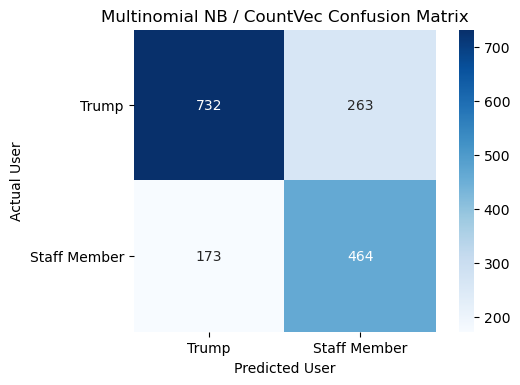

In [557]:
#Confusion matrix to show results from chosen model
mnb_cm = confusion_matrix(y_test_mnb, y_pred_mnb)

plt.figure(dpi=100)
sns.heatmap(mnb_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('Multinomial NB / CountVec Confusion Matrix')
plt.yticks(rotation=0);

In [361]:
true_neg, false_pos = mnb_cm[0]
false_neg, true_pos = mnb_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

mnb_temp = pd.DataFrame(columns = ['MultinomialNB'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

mnb_temp.loc['Accuracy'] = accuracy
mnb_temp.loc['Precision'] = precision
mnb_temp.loc['Recall'] = recall
mnb_temp.loc['F1 Score'] = f1

mnb_temp

,MultinomialNB
Accuracy,0.733
Precision,0.638
Recall,0.728
F1 Score,0.68


### Print final results

In [362]:
results = pd.concat([lr_temp, nb_temp, mnb_temp] , axis = 1)

results

,LogReg,BernoulliNB,MultinomialNB
Accuracy,0.76,0.743,0.733
Precision,0.723,0.719,0.638
Recall,0.626,0.562,0.728
F1 Score,0.671,0.631,0.68


# Classification with NMF Model using TF-IDF Vectorizer features

In [549]:
X = df['text']
y = df['device']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create DataFrame to hold on three classification model results
results_tfidf = pd.DataFrame(columns = ['LogReg' , 'BernoulliNB' , 'XGBoost'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

#Creating training and testing data based on CountVectorizer model from above
X_train = cv_tfidf.fit_transform(X_train)
X_text = cv_tfidf.transform(X_test)

#Confirming results are the same as doc_term matrix
pd.DataFrame(X_train.toarray(), columns=cv_tfidf.get_feature_names()).head()

C:\Users\jayju\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,abc newswashington,abe,abe japan,abedin,aberdeen,ability,able,abolish,absolute,...,youve,yr,yr high,zero,zero credibility,zogby,zogby poll,zones,zucker,zuckerman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create Logistic Regression Model

Using as baseline results for comparison.

,LogReg
Accuracy,0.744
Precision,0.718
Recall,0.567
F1 Score,0.634


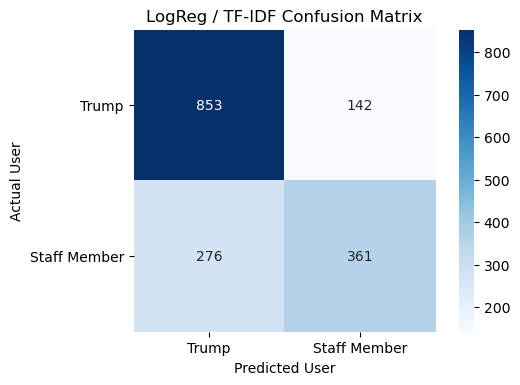

In [555]:
lr = LogisticRegression()

lr.fit(X_train , y_train)
y_pred = lr.predict(X_text)

#Confusion matrix to show results from chosen model
lr_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(lr_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('LogReg / TF-IDF Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = lr_cm[0]
false_neg, true_pos = lr_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

lr_temp = pd.DataFrame(columns = ['LogReg'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

lr_temp.loc['Accuracy'] = accuracy
lr_temp.loc['Precision'] = precision
lr_temp.loc['Recall'] = recall
lr_temp.loc['F1 Score'] = f1

lr_temp

### Create Bernoulli Naive Bayes Model

Using Bernoulli Naive Bayes because it works well with binary variables. The CountVectorizer that created the doc_term matrix sets parameter 'binary' to True (returns True / False on if the term is in the document). 

,BernoulliNB
Accuracy,0.743
Precision,0.719
Recall,0.562
F1 Score,0.631


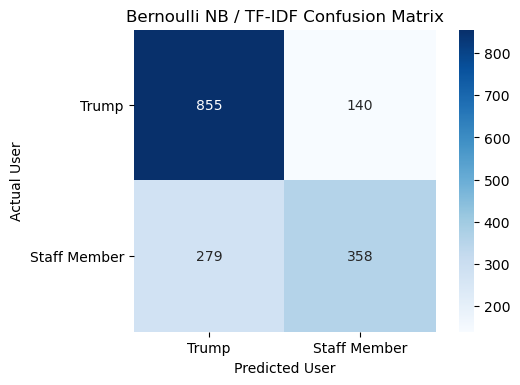

In [554]:
nb = BernoulliNB()

nb.fit(X_train , y_train)
y_pred = nb.predict(X_text)

#Confusion matrix to show results from chosen model
nb_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(nb_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('Bernoulli NB / TF-IDF Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = nb_cm[0]
false_neg, true_pos = nb_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

nb_temp = pd.DataFrame(columns = ['BernoulliNB'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

nb_temp.loc['Accuracy'] = accuracy
nb_temp.loc['Precision'] = precision
nb_temp.loc['Recall'] = recall
nb_temp.loc['F1 Score'] = f1

nb_temp

### Create Multinomial Naive Bayes Model

The traditional Naive Bayes model used for text classification.

,MultinomialNB
Accuracy,0.725
Precision,0.692
Recall,0.532
F1 Score,0.602


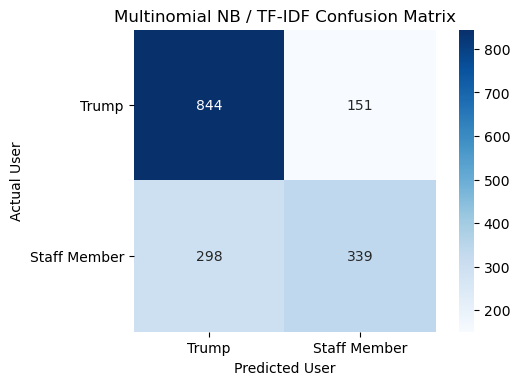

In [553]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_text)

#Confusion matrix to show results from chosen model
mnb_cm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=100)
sns.heatmap(mnb_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt = 'd',
           xticklabels=['Trump','Staff Member'],
           yticklabels=['Trump','Staff Member'])
plt.xlabel('Predicted User')
plt.ylabel('Actual User')
plt.title('Multinomial NB / TF-IDF Confusion Matrix')
plt.yticks(rotation=0);

true_neg, false_pos = mnb_cm[0]
false_neg, true_pos = mnb_cm[1]

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)

mnb_temp = pd.DataFrame(columns = ['MultinomialNB'] , 
                       index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])

mnb_temp.loc['Accuracy'] = accuracy
mnb_temp.loc['Precision'] = precision
mnb_temp.loc['Recall'] = recall
mnb_temp.loc['F1 Score'] = f1

mnb_temp

In [368]:
results_tfidf = pd.concat([lr_temp, nb_temp, mnb_temp] , axis = 1)

results_tfidf

,LogReg,BernoulliNB,MultinomialNB
Accuracy,0.744,0.743,0.725
Precision,0.718,0.719,0.692
Recall,0.567,0.562,0.532
F1 Score,0.634,0.631,0.602
